In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

D = DT.load_breast_cancer()
X = D.data
y = D.target

################################################################
# Consider malignant cases as positive (class 1)
# Need to invert classes
y = np.abs(y - 1)
################################################################

# division int training and test sub-sets
X1, X2, y1, y2 = train_test_split(X, y, test_size=169, stratify=y, random_state=42)

In [5]:
# import classifiers
from sklearn.svm import SVC
# from sklearn.linear_model import SVC, SGDClassifier #, LogisticRegression

# train classifiers
model_svc = SVC(kernel='linear', C=1.0, random_state=42)
model_svc.fit(X1, y1)

# predict
y_pred = model_svc.predict(X2)

# confusion matrix and number of errors

cm = confusion_matrix(y2, y_pred)
print(cm)
print('Number of errors: ', np.sum(y2 != y_pred))

# (tn, fp), (fn, tp) = confusion_matrix(y2, y2c > thresh)
#    0   1
# 0 [TN, FP]
# 1 [FN, TP] 

# 


[[104   2]
 [  9  54]]
Number of errors:  11


In [35]:
# calibrate probabilities and change threshold
y2c = model_svc.decision_function(X2)
thresh = -0.71
y2t = (y2c > thresh).astype(int)

# confusion matrix and number of errors
cm = confusion_matrix(y2, y2t)
print(cm)
print('Number of errors: ', np.sum(y2 != y2t))

(tn, fp), (fn, tp) = confusion_matrix(y2, y2t)
print('True positive rate: ', tp / (tp + fn))
print('False positive rate: ', fp / (fp + tn))

fp_rateP = fp / (tn+ fp)
recallP = tp / (tp + fn)
precisionP = tp / (tp + fp)



[[103   3]
 [  3  60]]
Number of errors:  6
True positive rate:  0.9523809523809523
False positive rate:  0.02830188679245283


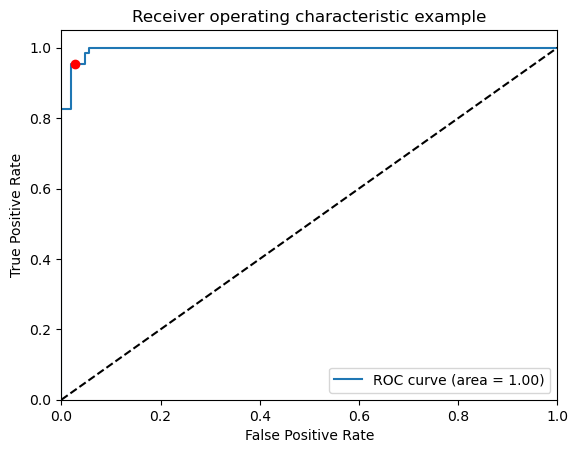

In [36]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y2, y2c)
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot(fp_rateP, recallP, 'or')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



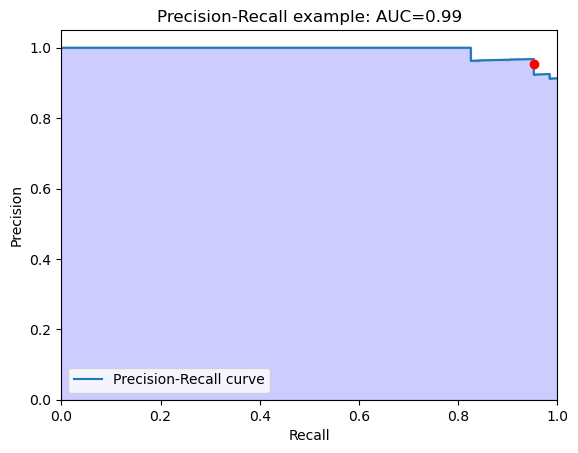

In [38]:
# presicion-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y2, y2c)
average_precision = average_precision_score(y2, y2c)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.plot(recall, precision, label='Precision-Recall curve')
plt.plot(recallP, precisionP, 'or')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()




In [39]:
# Preprocess the data using the function StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X1)
X1s = scaler.transform(X1)
X2s = scaler.transform(X2)


In [42]:
# train classifiers
model_svcN = SVC(kernel='linear', C=1.0, random_state=42)
model_svcN.fit(X1s, y1)

# predict
y_pred = model_svcN.predict(X2s)

# confusion matrix and number of errors

cm = confusion_matrix(y2, y_pred)
print(cm)
print('Number of errors: ', np.sum(y2 != y_pred))

# (tn, fp), (fn, tp) = confusion_matrix(y2, y2c > thresh)
# [TN, FP]
# [FN, TP]



[[106   0]
 [  6  57]]
Number of errors:  6


In [45]:
# calibrate probabilities and change threshold
y2c = model_svcN.decision_function(X2s)
thresh = -0.71

y2t = (y2c > thresh).astype(int)

# confusion matrix and number of errors
cm = confusion_matrix(y2, y2t)
print(cm)
print('Number of errors: ', np.sum(y2 != y2t))

(tn, fp), (fn, tp) = confusion_matrix(y2, y2t)
print('True positive rate: ', tp / (tp + fn))
print('False positive rate: ', fp / (fp + tn))

fp_ratePN = fp / (tn+ fp)
recallPN = tp / (tp + fn)
precisionPN = tp / (tp + fp)


[[104   2]
 [  3  60]]
Number of errors:  5
True positive rate:  0.9523809523809523
False positive rate:  0.018867924528301886


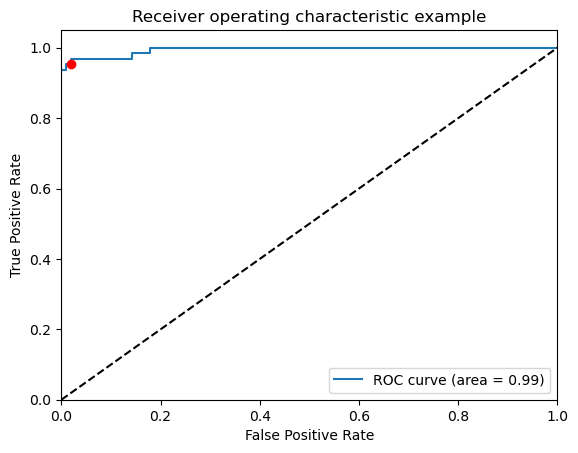

In [46]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y2, y2c)
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot(fp_ratePN, recallPN, 'or')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


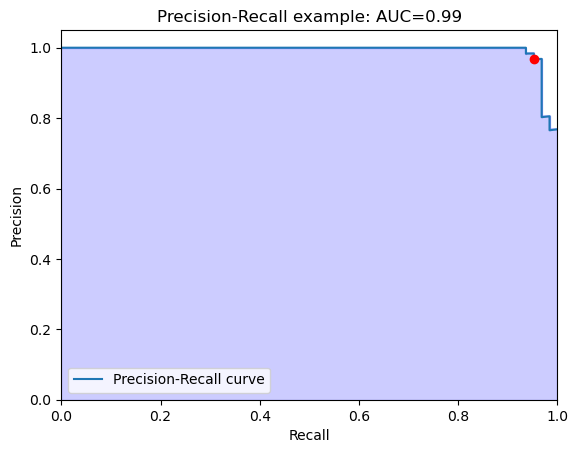

In [47]:
# presicion-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y2, y2c)
average_precision = average_precision_score(y2, y2c)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.plot(recall, precision, label='Precision-Recall curve')
plt.plot(recallPN, precisionPN, 'or')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


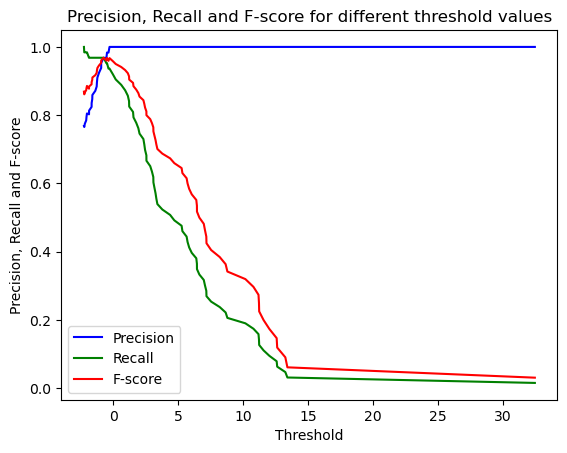

In [48]:
# precion recall and f-score for the thresholds of the ROC curve
# roc curve and auc with thresholds used for the thresholds of the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y2, y2c)
roc_auc = auc(fpr, tpr)
precision, recall, thresholds = precision_recall_curve(y2, y2c)
# f-score
fscore = (2 * precision * recall) / (precision + recall)

plt.plot(thresholds, precision[:-1], 'b', label='Precision')
plt.plot(thresholds, recall[:-1], 'g', label='Recall')
plt.plot(thresholds, fscore[:-1], 'r', label='F-score')
plt.title('Precision, Recall and F-score for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision, Recall and F-score')
plt.legend(loc="lower left")
plt.show()



In [ ]:
# Treinar classificador randomForest e LogisticRegression

modelSVC = SVC(kernel='linear', C=1, probability=True)
modelSVC.fit(X1, y1)

modelRF = randomForest(n_estimators=100, max_depth=5, random_state=42)
modelRF.fit(X1, y1)

modelLR = LogisticRegression()
modelLR.fit(X1, y1)

# Calcular probabilidades de cada classificador
y1_probSVC = modelSVC.predict_proba(X1)[:, 1]
y1_probRF = modelRF.predict_proba(X1)[:, 1]
y1_probLR = modelLR.predict_proba(X1)[:, 1]

# Calcular probabilidades de cada classificador
y2_probSVC = modelSVC.predict_proba(X2)[:, 1]
y2_probRF = modelRF.predict_proba(X2)[:, 1]
y2_probLR = modelLR.predict_proba(X2)[:, 1]

# Calcular curvas ROC
fprSVC, tprSVC, thresholdsSVC = roc_curve(y1, y1_probSVC)
fprRF, tprRF, thresholdsRF = roc_curve(y1, y1_probRF)
fprLR, tprLR, thresholdsLR = roc_curve(y1, y1_probLR)

# Calcular curvas ROC
fprSVC2, tprSVC2, thresholdsSVC2 = roc_curve(y2, y2_probSVC)
fprRF2, tprRF2, thresholdsRF2 = roc_curve(y2, y2_probRF)
fprLR2, tprLR2, thresholdsLR2 = roc_curve(y2, y2_probLR)

# Calcular matriz de confusão
y1_predSVC = modelSVC.predict(X1)
y1_predRF = modelRF.predict(X1)
y1_predLR = modelLR.predict(X1)


